In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
import itertools
import random
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [2]:
#df_All = pd.read_csv(r"C:\Users\saust\OneDrive - Sasol\1 Project rC4\Jupyter Notebooks\Report 10-20-23 No Fluff\df_All_Avg.csv")

df_All_1o2 = pd.read_csv('3 Feature Selection/contData_all_Avg - 1o2.csv')
df_All_1o2 = pd.read_csv('3 Feature Selection/contData_all_Avg - 2o2.csv')

#df_All = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\CodeSpace DLs\102423\Project rC4\3 Final Machine Butanol\df_CDCA6.csv")


In [16]:
# Concatenate (union) the dataframes
df_All = pd.concat([df_All_1o2, df_All_1o2], ignore_index=True)

print(df_All.describe())

            425 %Al       Butanol       Decanol       Ethanol       Hexanol  \
count  49240.000000  49240.000000  49240.000000  49240.000000  49240.000000   
mean       6.097349      9.705685      3.406889     18.813964      3.657356   
std        0.278444      9.627377      1.659686     16.990928      2.199754   
min        5.085695      0.516250      0.113333      0.690000      0.071975   
25%        5.951909      3.904775      1.997500      6.271251      1.656667   
50%        6.094885      6.038125      3.425000     13.294800      3.495471   
75%        6.243994     11.196361      4.613333     25.827869      5.310833   
max        7.170805     55.772500      7.966667     93.062500     10.248325   

            Octanol      AYC55580       DI55102       DI55152       DI55580  \
count  49240.000000  49240.000000  49240.000000  49240.000000  49240.000000   
mean       4.171267     12.264709      0.929050      0.953765      1.011408   
std        2.344821      4.884550      0.078237    

In [4]:
# Set max columns to display
pd.set_option('display.max_columns', None)

In [5]:
# df_All = df_All[df_All['Date'] > '2022-06-15 00:00:00']

In [6]:
# List of columns to exclude to run XGboost feature selection
exclude_columns = ['Octanol', 'Hexanol',
       'Ethanol', 'Decanol',
       
       'TI52014', 'TI55013', 'TI55014', 'TI55015', 'TI55016', 'TI55017', 'TI55021', 'TI55023',
       'TC52015', 'FC52018', 'II52554', 'TI40050', 'VI52558B'

       # 'FC55102', 'FC55152', 'LC55557', 'LC55568', 'TC55555',

       # '425 SAO Al', 'FFC55553', 'LC52572', 'LC90366',

       # 'FC42428', 'LC55553',

       # 'FC55009'
                   ]

# Create a new DataFrame without the excluded columnsd
df_All = df_All.drop(columns=exclude_columns)

In [7]:
df_All.columns

Index(['425 %Al', 'Butanol', 'AYC55580', 'DI55102', 'DI55152', 'DI55580',
       'FC42428', 'FC55003', 'FC55009', 'FC55102', 'FC55152', 'FC55552',
       'FC55555', 'FC55569', 'FC55576', 'FFC55553', 'FFC55555', 'FYC55553',
       'LC52572', 'LC55553', 'LC55555', 'LC55557', 'LC55568', 'LC90366',
       'LC90368', 'PI55004', 'PI55020', 'PI55560', 'TC55552', 'TC55553',
       'TC55555', 'TC55566'],
      dtype='object')

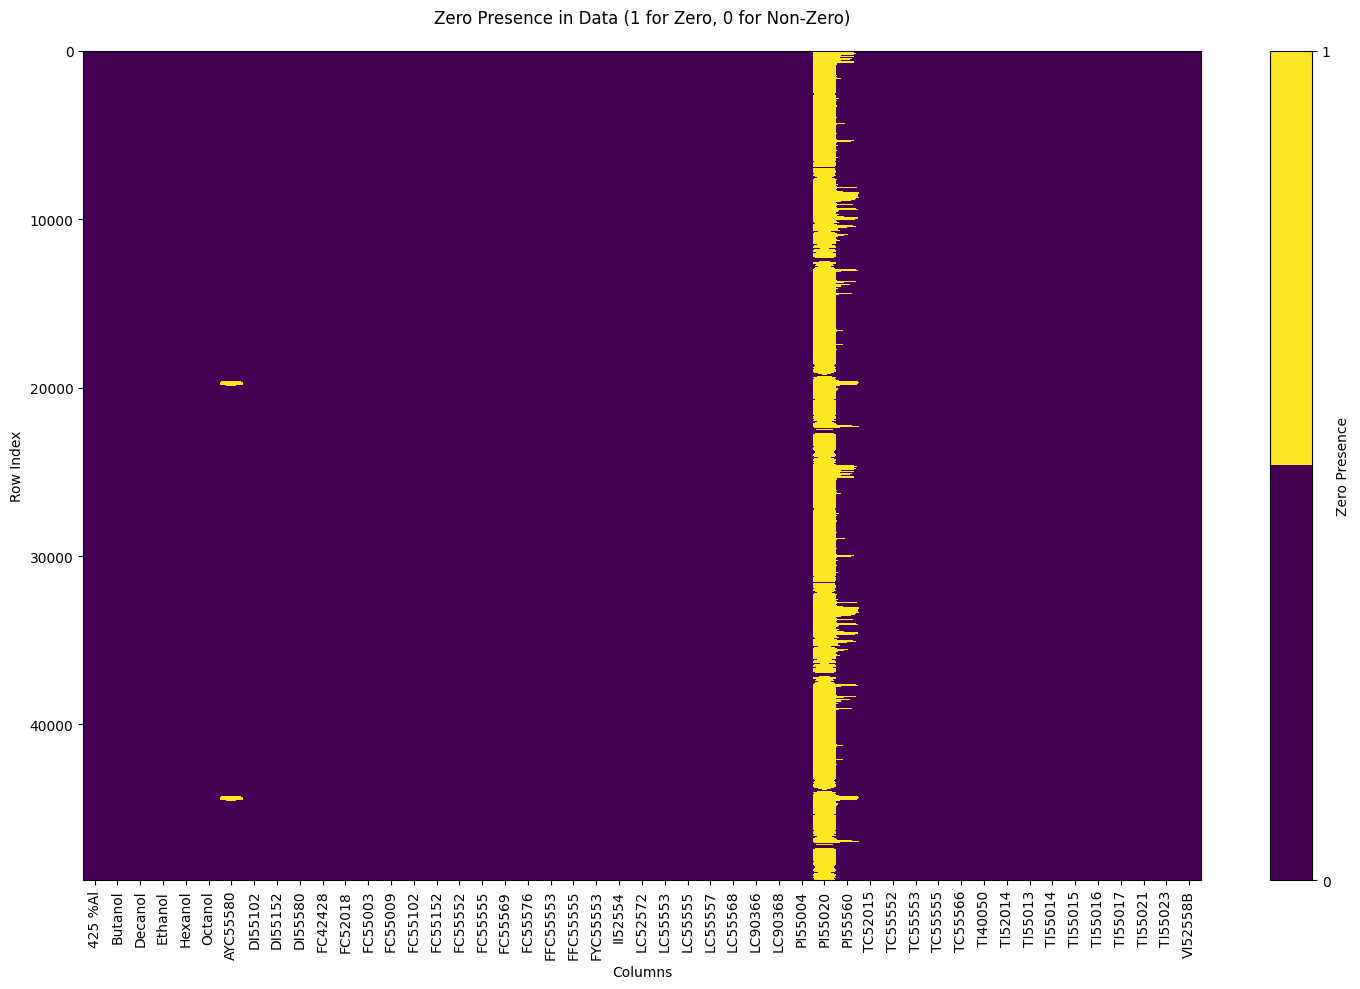

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a binary matrix to represent zeros (1 for zero, 0 for non-zero)
zero_matrix = np.where(df_All < 0, 1, 0)

# Plotting setup
fig, ax = plt.subplots(figsize=(15, 10))
cmap = plt.get_cmap('viridis', 2)  # Colormap that differentiates between 0 and 1

# Plotting heatmap
cax = ax.imshow(zero_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='Zero Presence')
plt.title("Zero Presence in Data (1 for Zero, 0 for Non-Zero)", pad=20)

# Making columns readable and vertical
plt.xticks(range(df_All.shape[1]), df_All.columns, rotation=90)
plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()


In [9]:
import pandas as pd

# Assuming you have your DataFrame df_All available
# df_All = ... (your DataFrame loading or creation here)

# Calculate the statistics for each column in df_All
total_rows = len(df_All)
non_zero_count = df_All.astype(bool).sum(axis=0)  # Count non-zero values
zero_count = total_rows - non_zero_count  # Calculate zero count
zero_percentage = (zero_count / total_rows) * 100

# Store these in a DataFrame
zero_stats = pd.DataFrame({
    'ID': df_All.columns,
    'total_rows': total_rows,
    'non_zero_count': non_zero_count.values,
    'zero_count': zero_count.values,
    'zero_percentage': zero_percentage.values
})

print(zero_stats)


          ID  total_rows  non_zero_count  zero_count  zero_percentage
0    425 %Al       49240           49240           0         0.000000
1    Butanol       49240           49240           0         0.000000
2   AYC55580       49240           49240           0         0.000000
3    DI55102       49240           49240           0         0.000000
4    DI55152       49240           49240           0         0.000000
5    DI55580       49240           49240           0         0.000000
6    FC42428       49240           49240           0         0.000000
7    FC55003       49240           49240           0         0.000000
8    FC55009       49240           49240           0         0.000000
9    FC55102       49240           49240           0         0.000000
10   FC55152       49240           49240           0         0.000000
11   FC55552       49240           49240           0         0.000000
12   FC55555       49240           49240           0         0.000000
13   FC55569       4

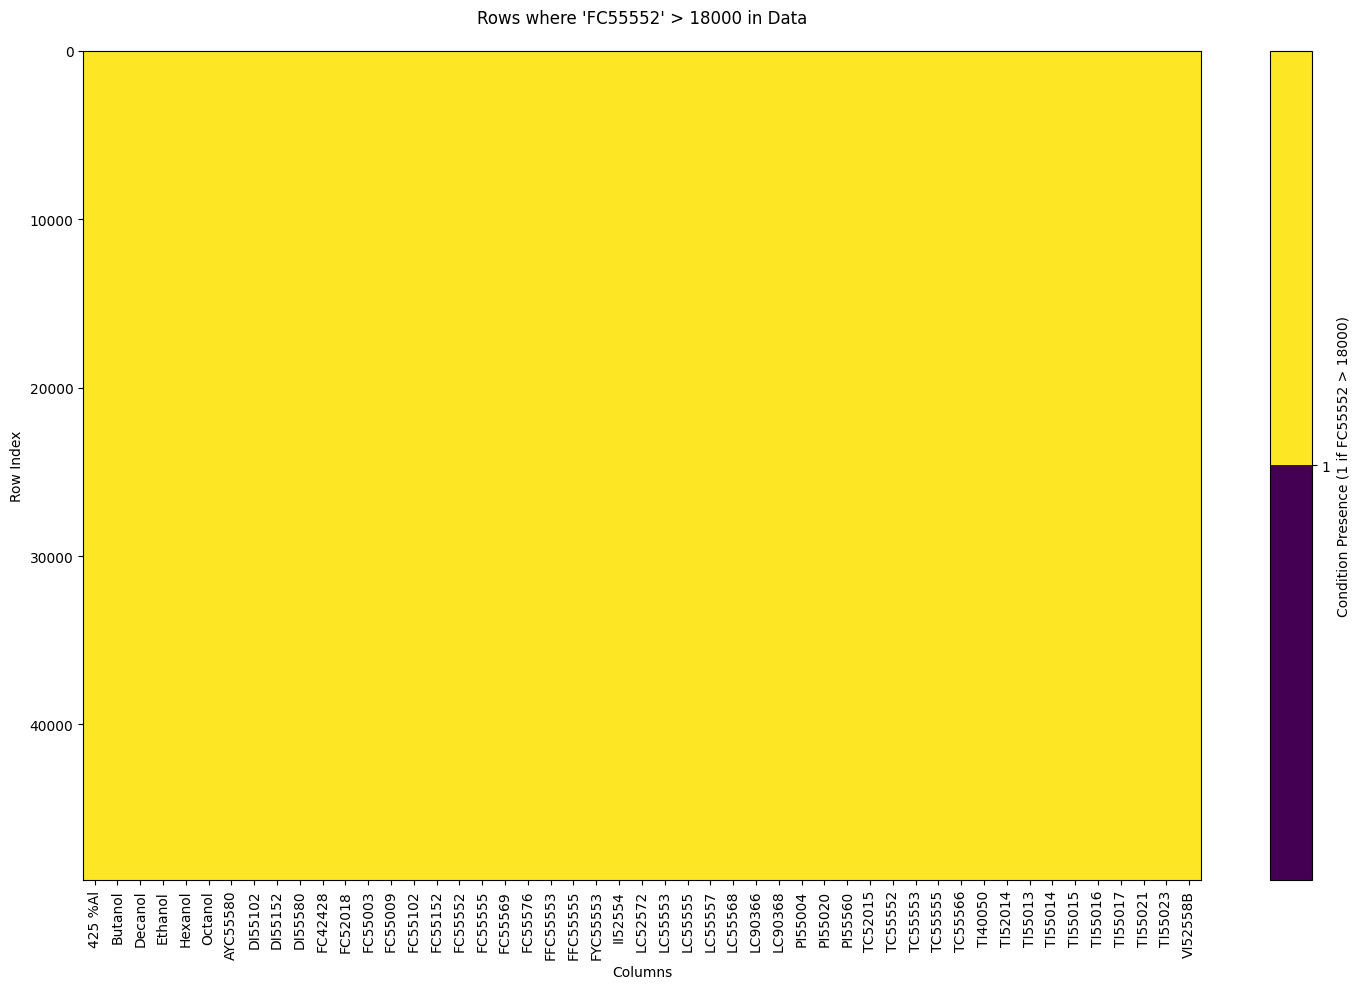

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df_All is your DataFrame
# df_All = ...

# Create a binary matrix based on the condition in 'FC55552' column
condition_matrix = np.where(df_All['LC90366'] < 18000, 1, 0)
# Apply the condition to each row
highlight_matrix = np.repeat(condition_matrix[:, np.newaxis], df_All.shape[1], axis=1)

# Plotting setup
fig, ax = plt.subplots(figsize=(15, 10))
cmap = plt.get_cmap('viridis', 2)  # Colormap that differentiates between 0 and 1

# Plotting heatmap
cax = ax.imshow(highlight_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='Condition Presence (1 if FC55552 > 18000)')
plt.title("Rows where 'FC55552' > 18000 in Data", pad=20)

# Making columns readable and vertical
plt.xticks(range(df_All.shape[1]), df_All.columns, rotation=90)
plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()
